In [28]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np

In [29]:
df = pd.read_csv('garments_worker_productivity.csv')
df

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


In [30]:
df.shape

(1197, 15)

In [31]:
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [33]:
df.nunique()

date                      59
quarter                    5
department                 3
day                        6
team                      12
targeted_productivity      9
smv                       70
wip                      548
over_time                143
incentive                 48
idle_time                 12
idle_men                  10
no_of_style_change         3
no_of_workers             61
actual_productivity      879
dtype: int64

In [34]:
df['wip']

0       1108.0
1          NaN
2        968.0
3        968.0
4       1170.0
         ...  
1192       NaN
1193       NaN
1194       NaN
1195       NaN
1196       NaN
Name: wip, Length: 1197, dtype: float64

In [35]:
df['wip'] = df['wip'].replace(np.nan, 0)
df['wip']

0       1108.0
1          0.0
2        968.0
3        968.0
4       1170.0
         ...  
1192       0.0
1193       0.0
1194       0.0
1195       0.0
1196       0.0
Name: wip, Length: 1197, dtype: float64

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    1197 non-null   float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [37]:
df.drop_duplicates(keep='first', inplace=True)

In [38]:
df.shape

(1197, 15)

## Analyze Distributions

In [40]:
num_cols = df.select_dtypes(exclude=['object'])
cat_cols = df.select_dtypes(include=['object'])

In [41]:
df.nunique()

date                      59
quarter                    5
department                 3
day                        6
team                      12
targeted_productivity      9
smv                       70
wip                      549
over_time                143
incentive                 48
idle_time                 12
idle_men                  10
no_of_style_change         3
no_of_workers             61
actual_productivity      879
dtype: int64

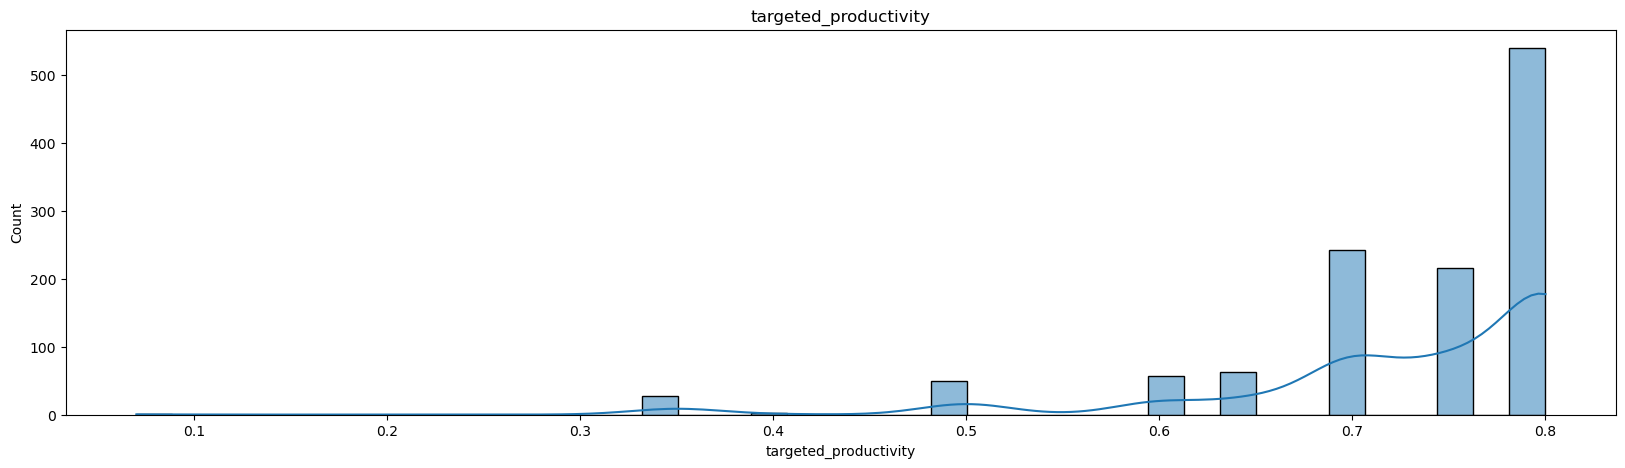

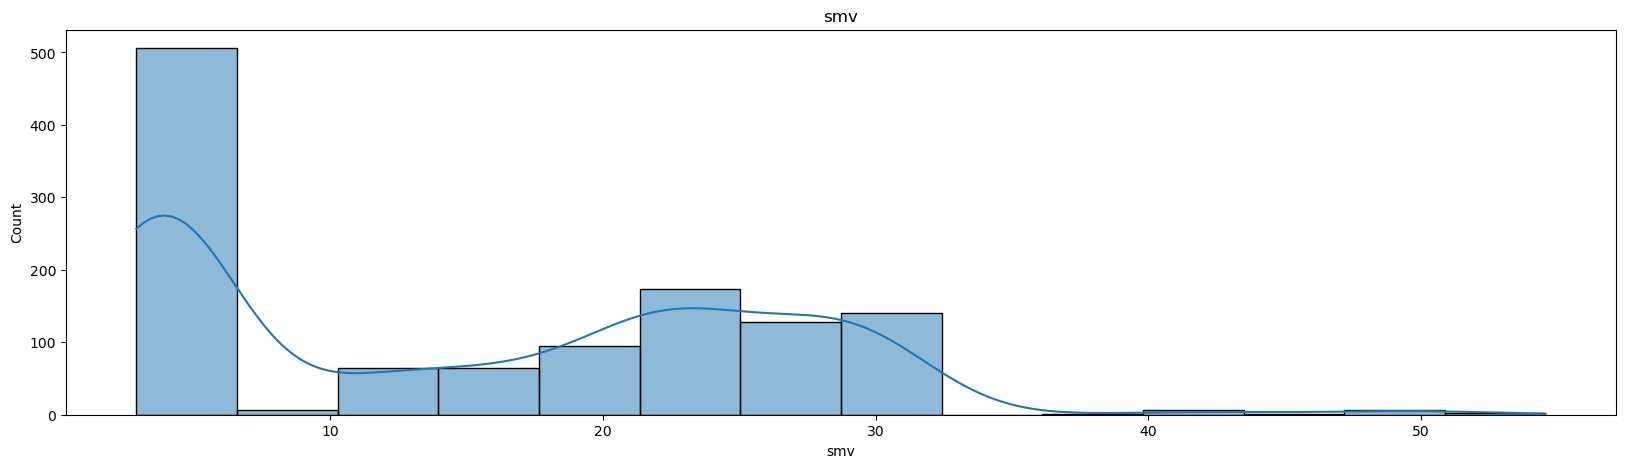

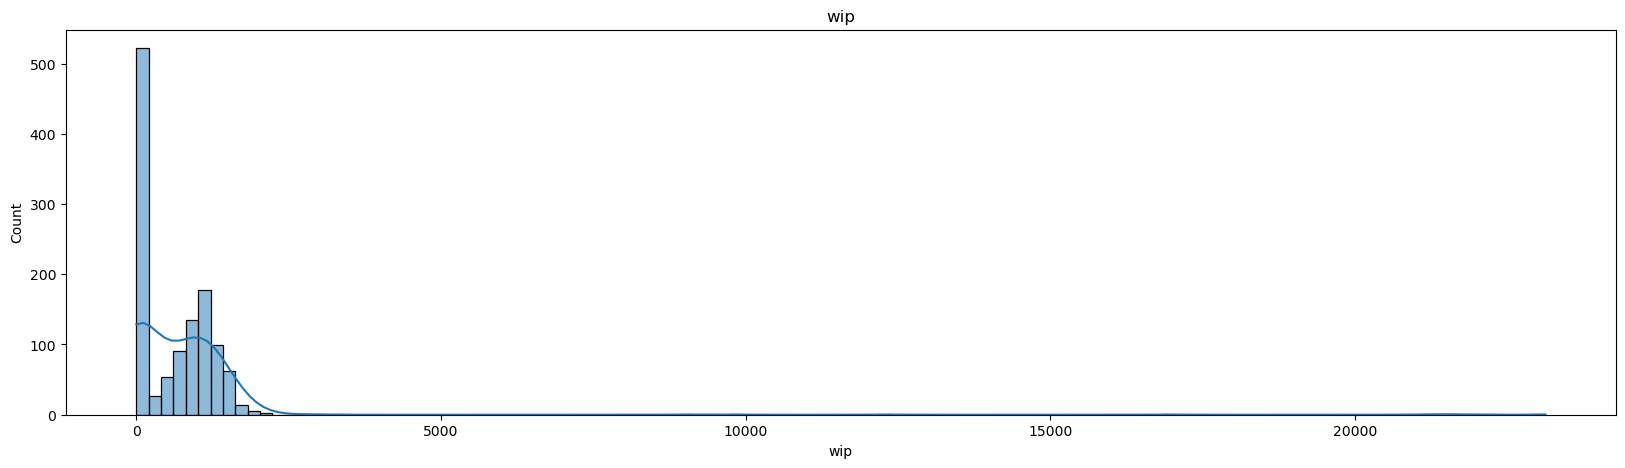

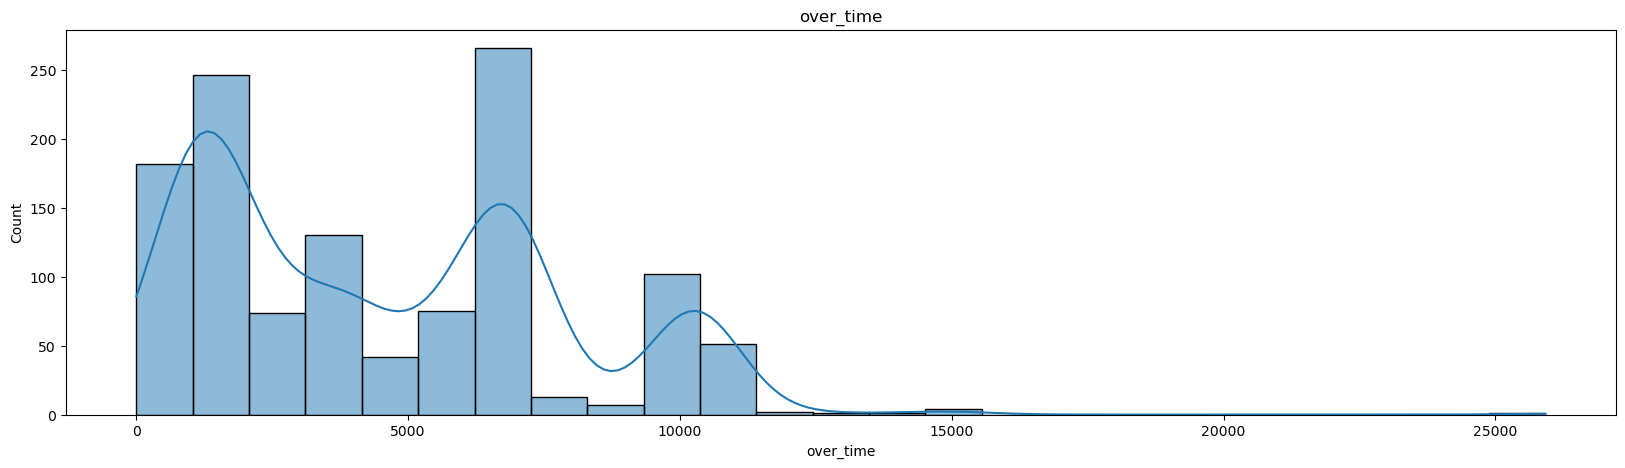

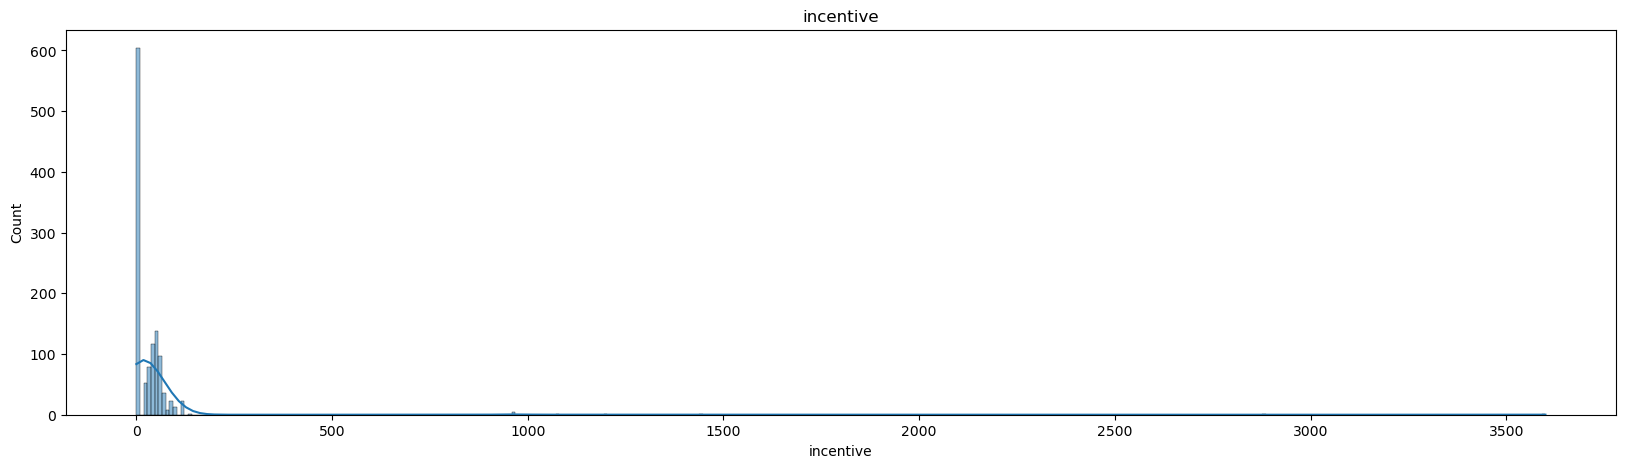

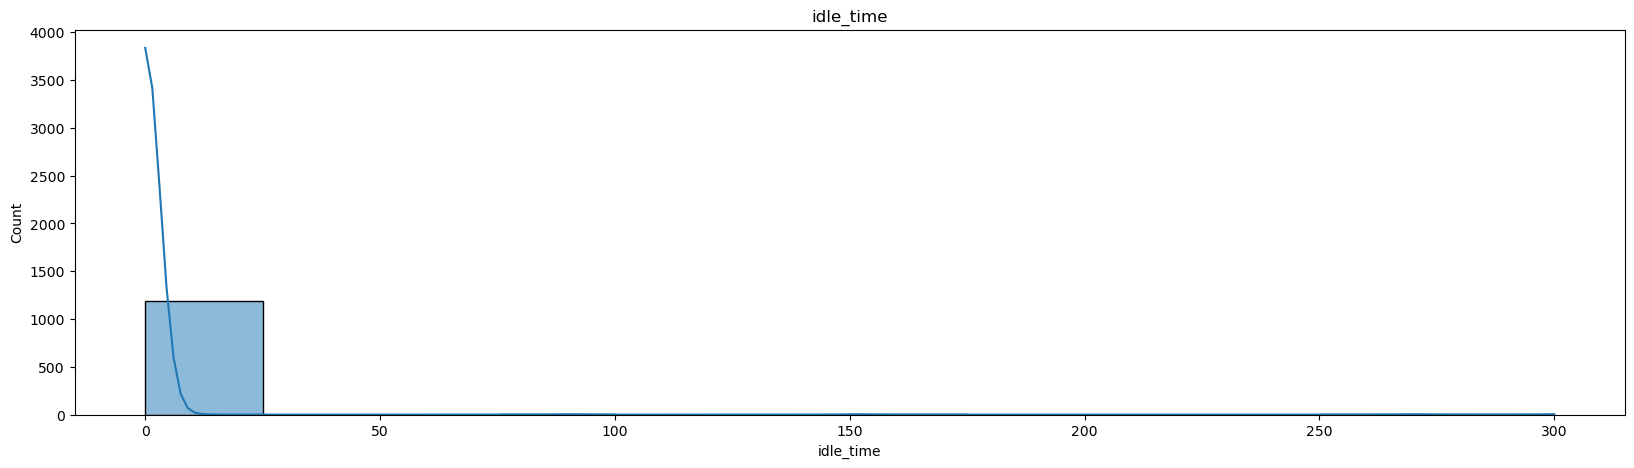

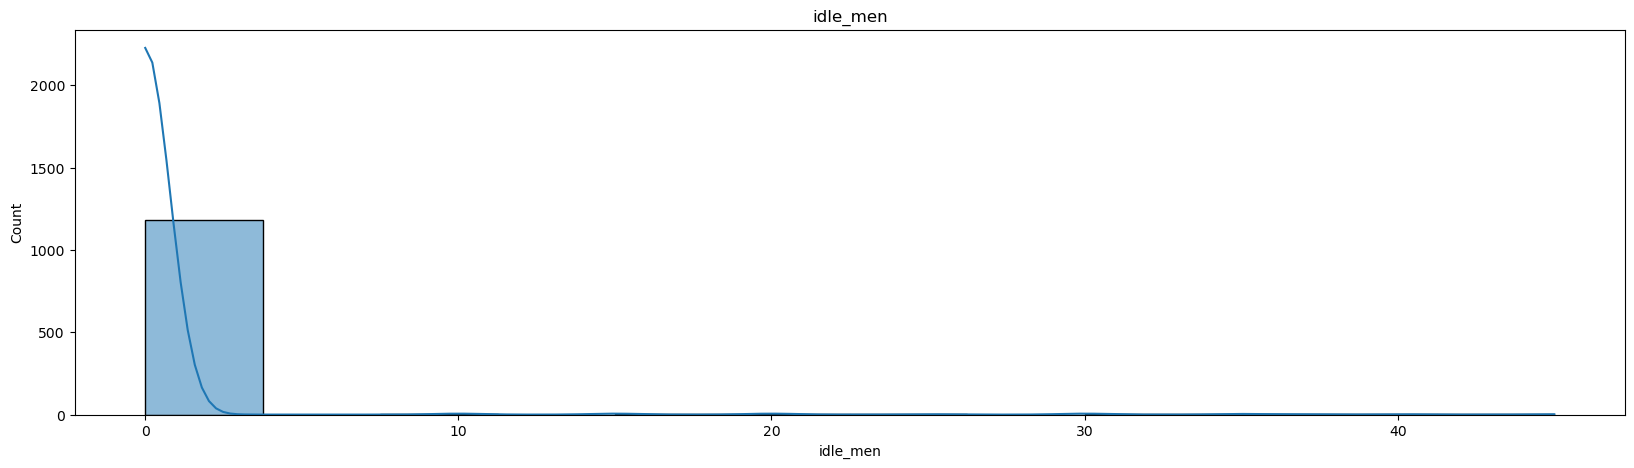

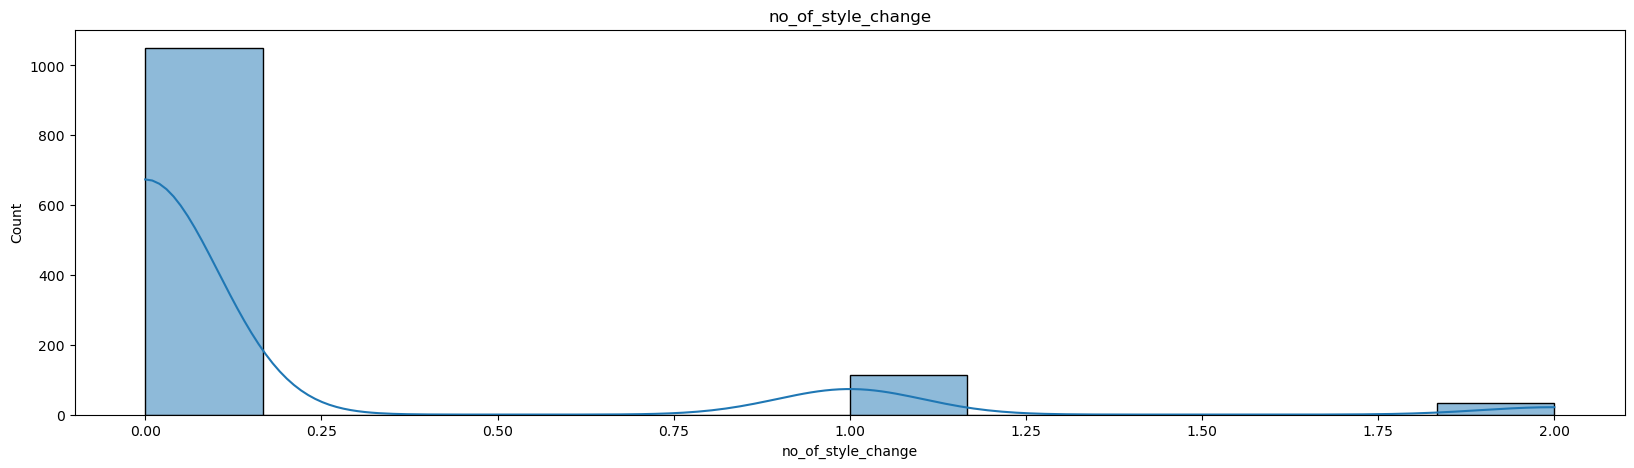

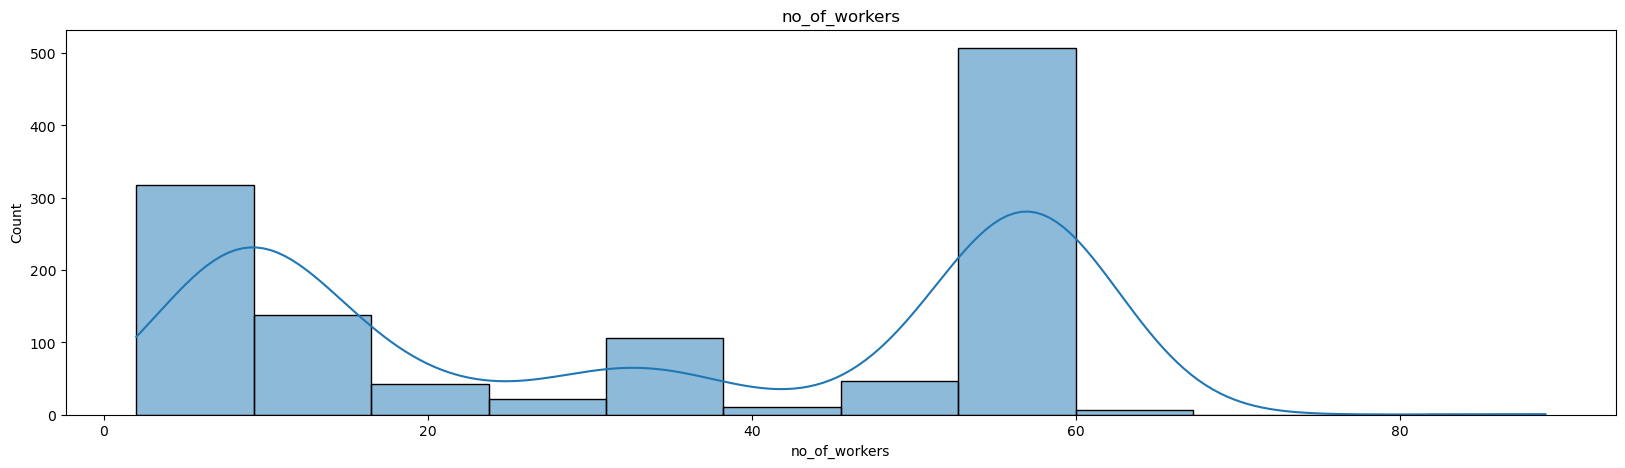

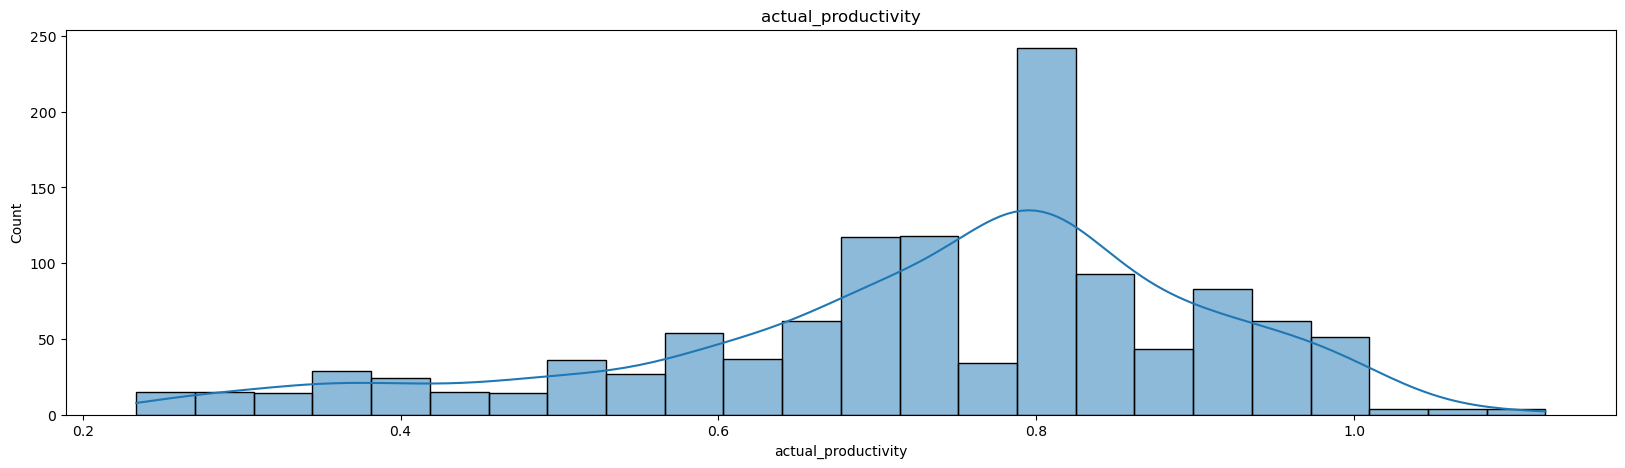

In [42]:
for i in num_cols.columns[1:]:
    plt.figure(figsize=(20,5))
    sns.histplot(df[i], kde=True)
    plt.title(i)

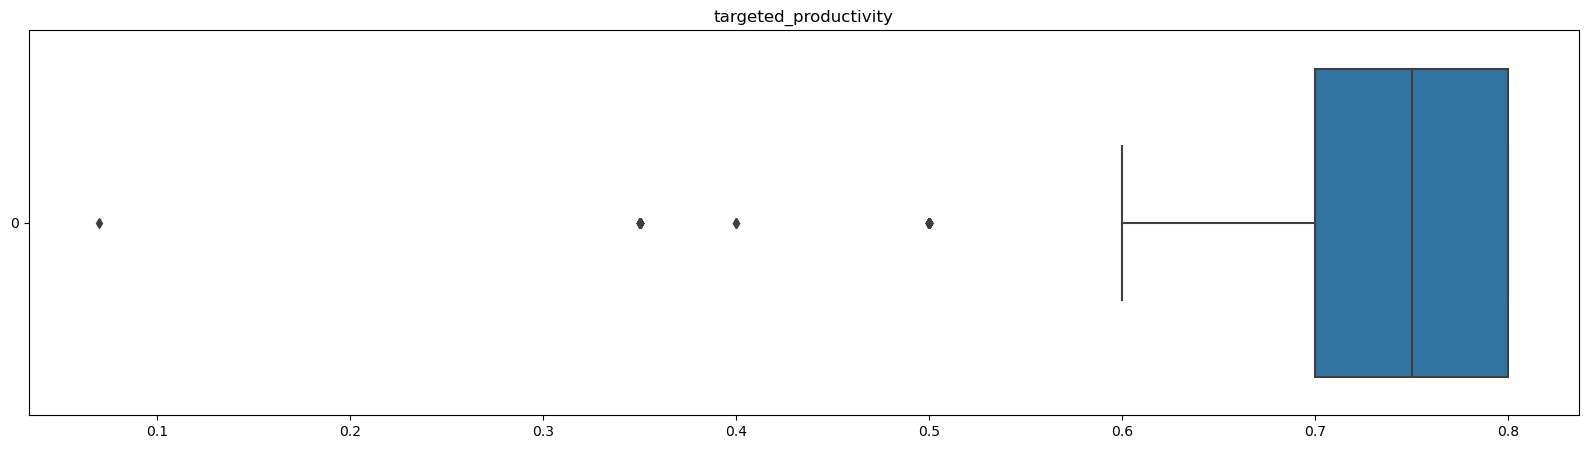

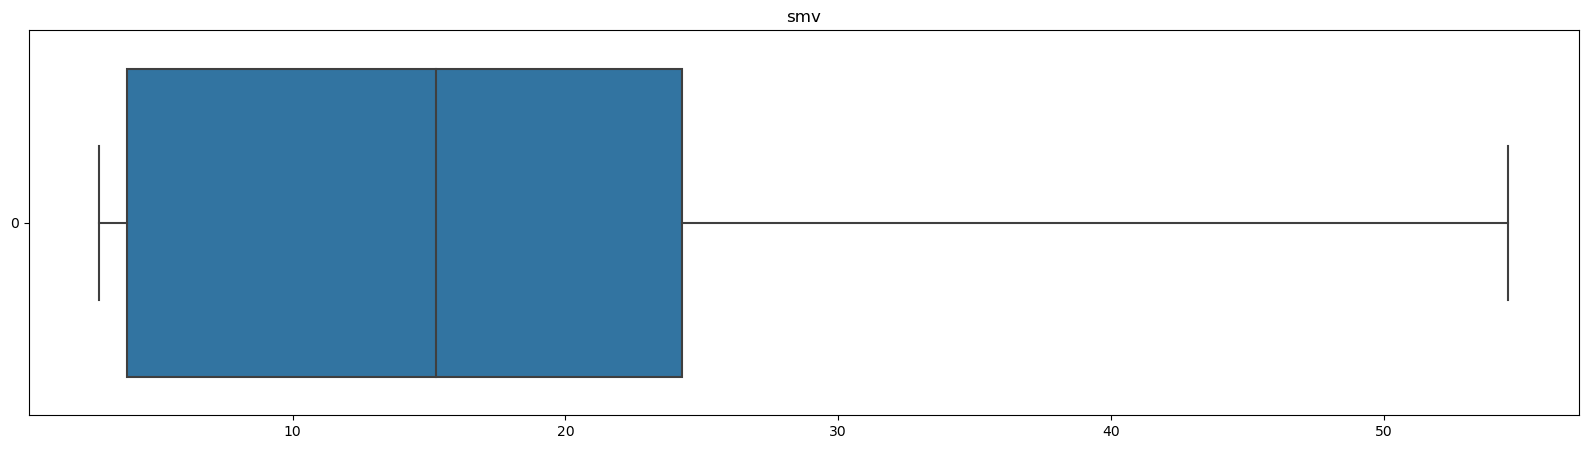

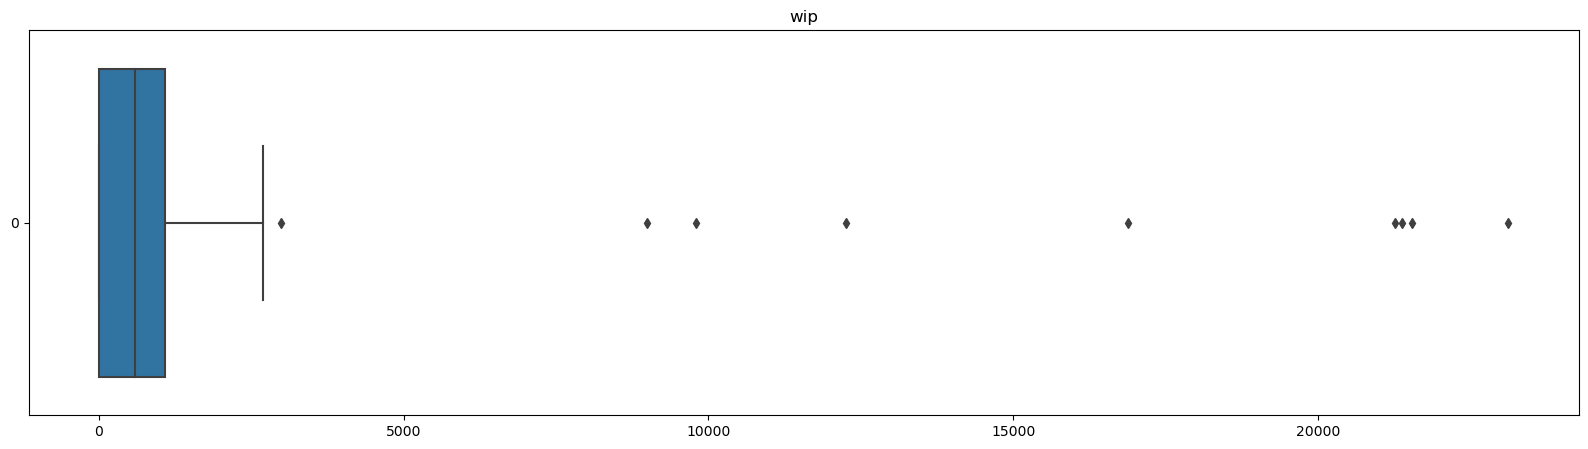

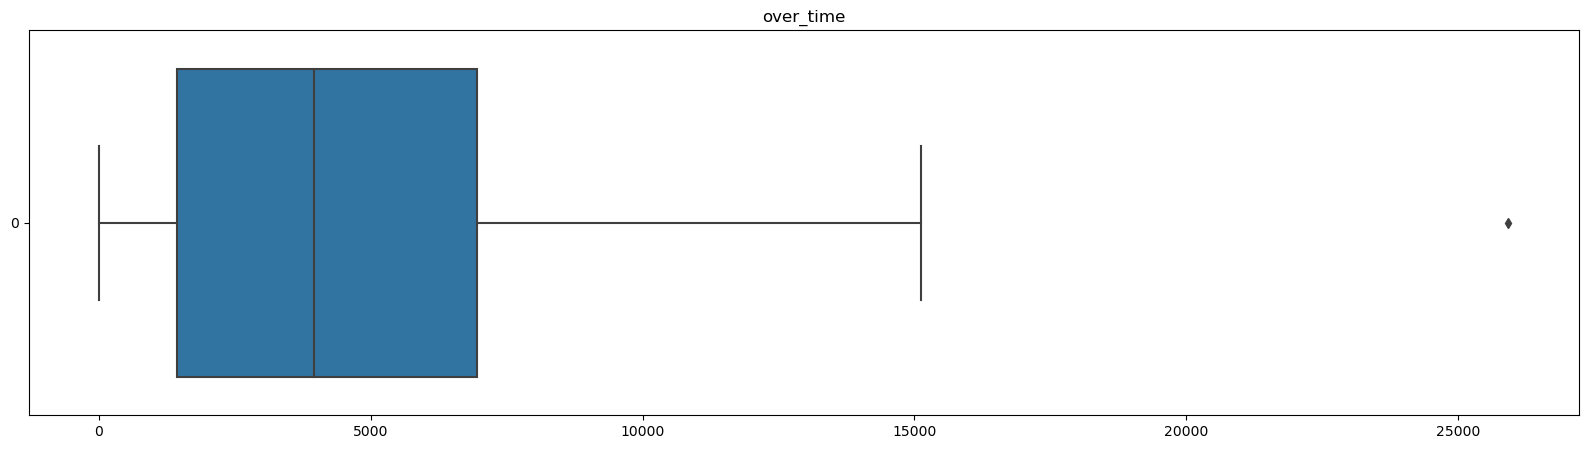

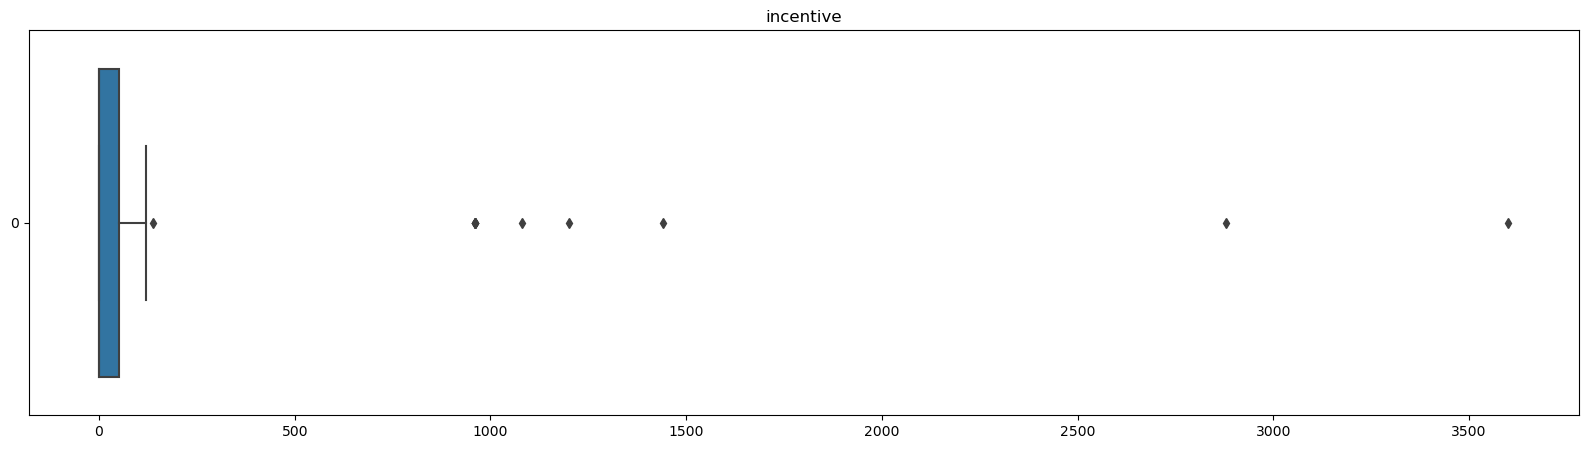

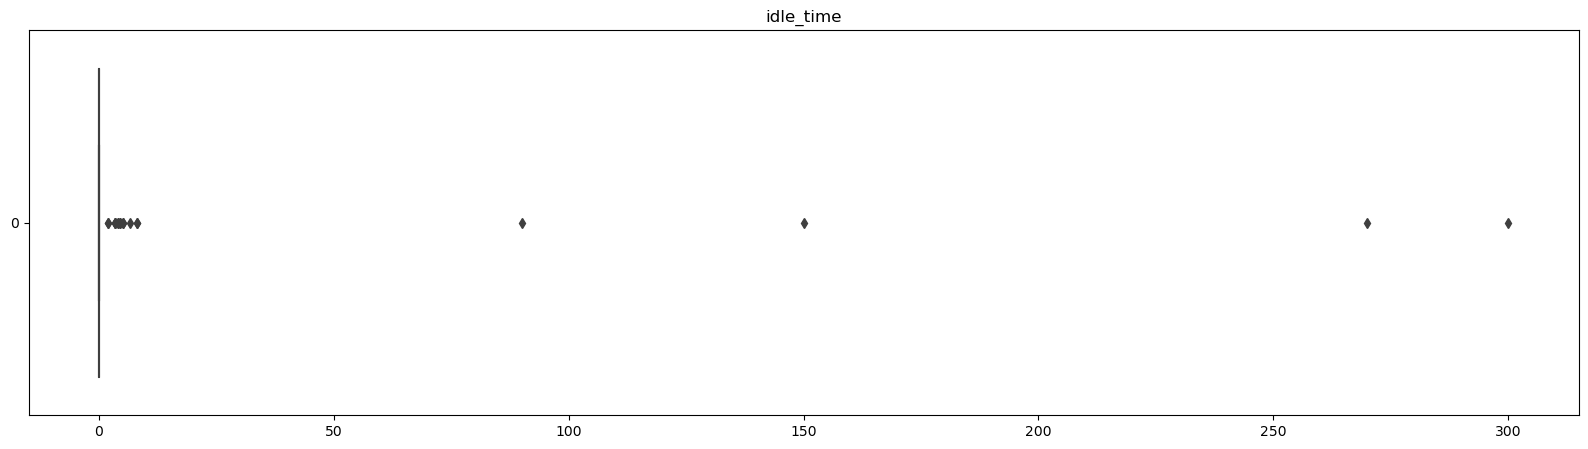

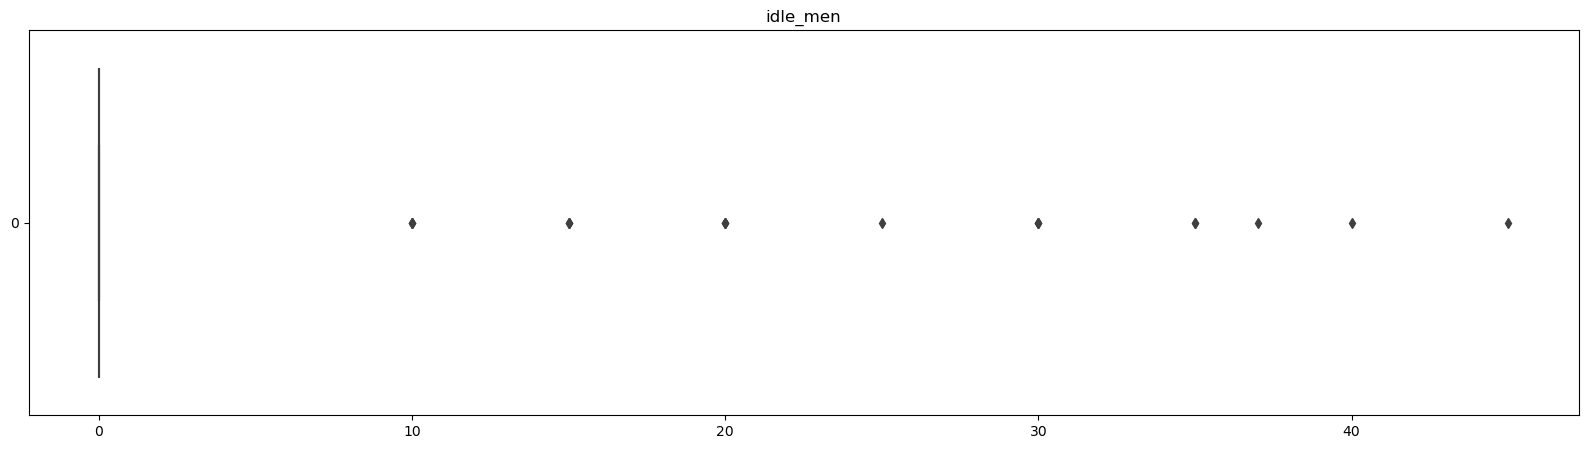

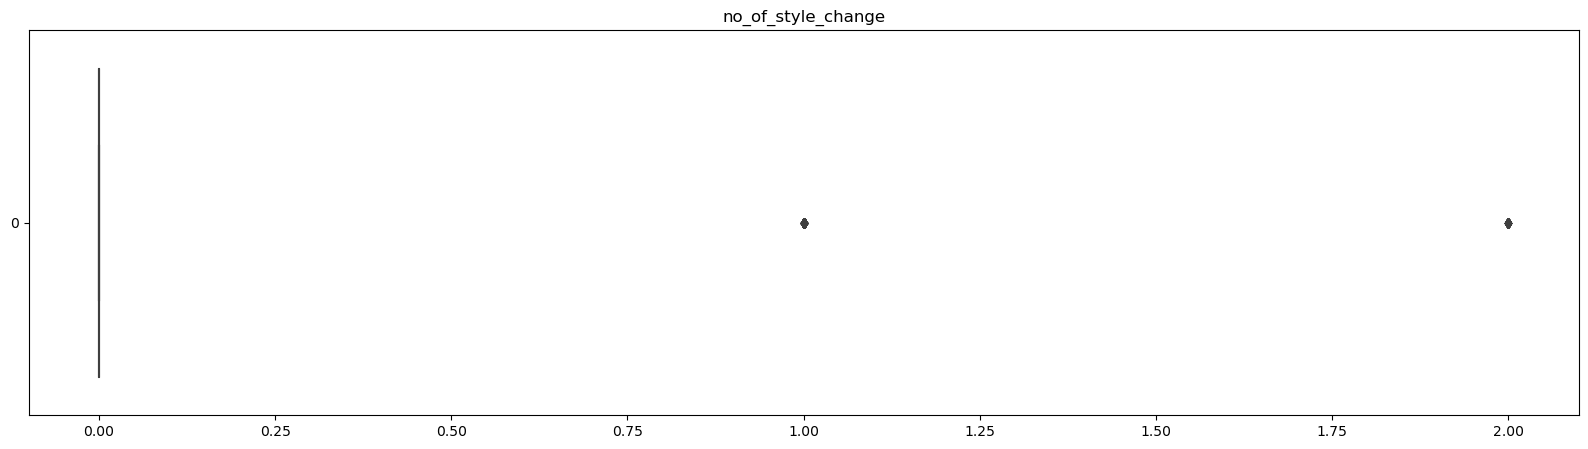

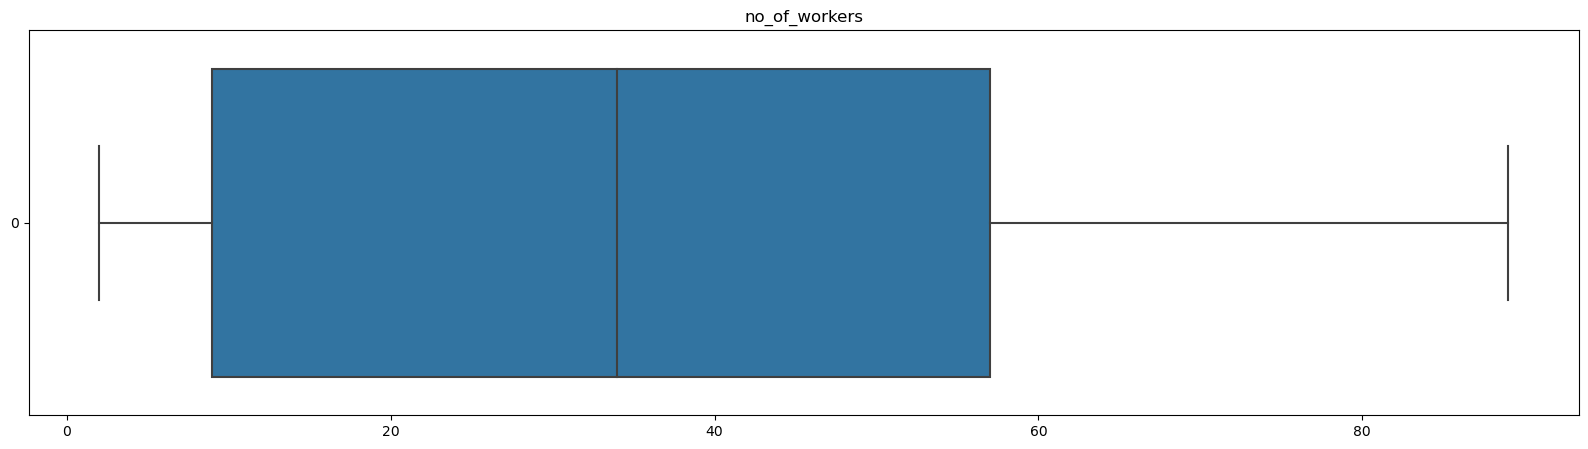

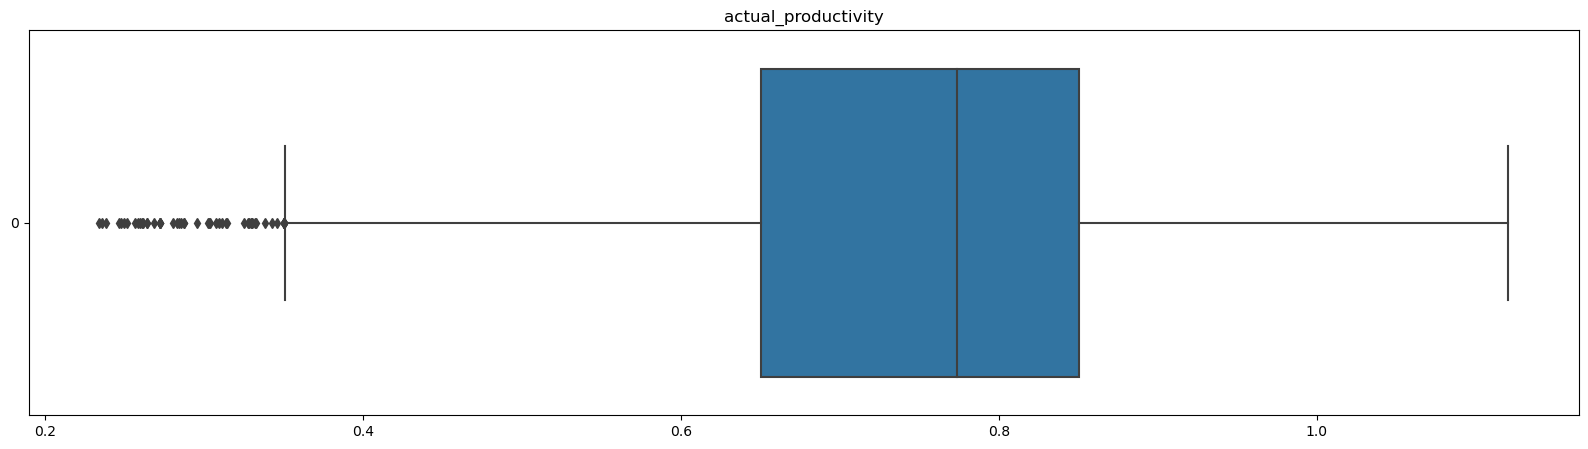

In [43]:
for i in num_cols.columns[1:]:
    plt.figure(figsize=(20,5))
    sns.boxplot(df[i], orient='h')
    plt.title(i)

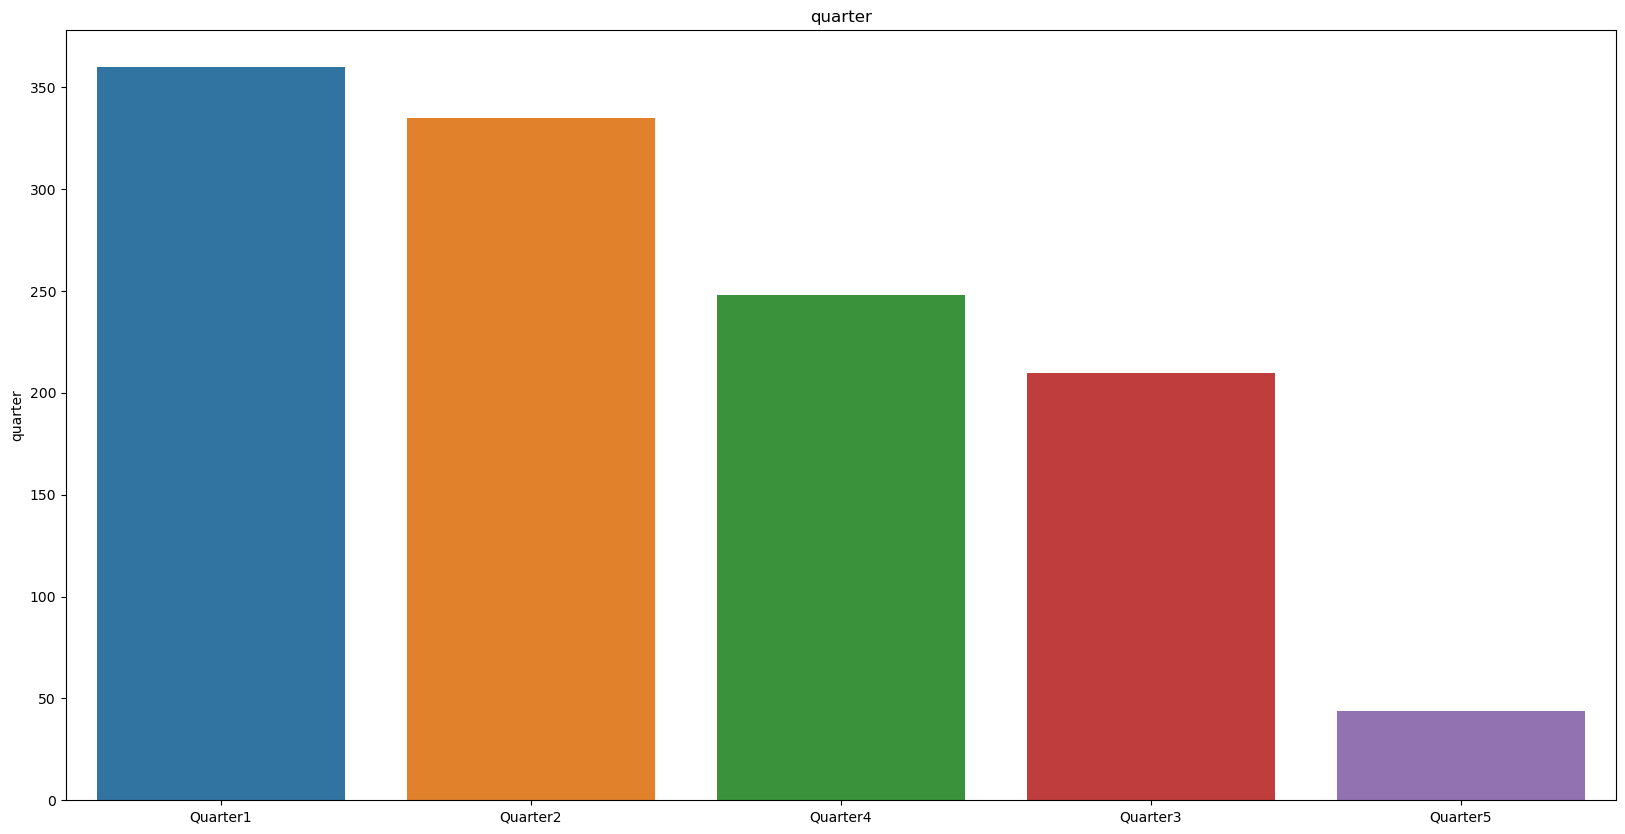

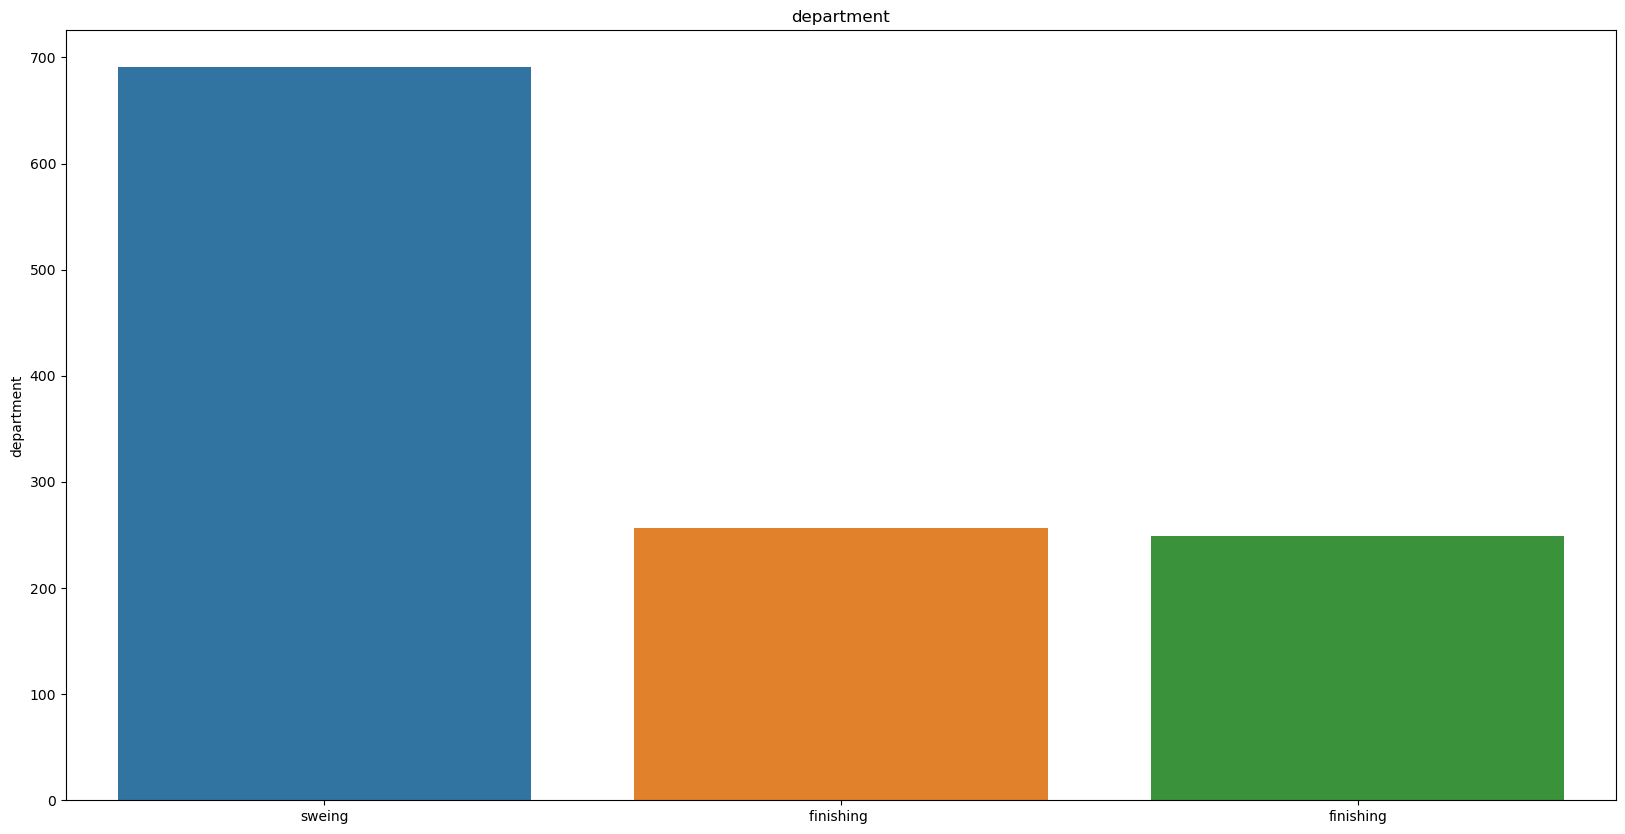

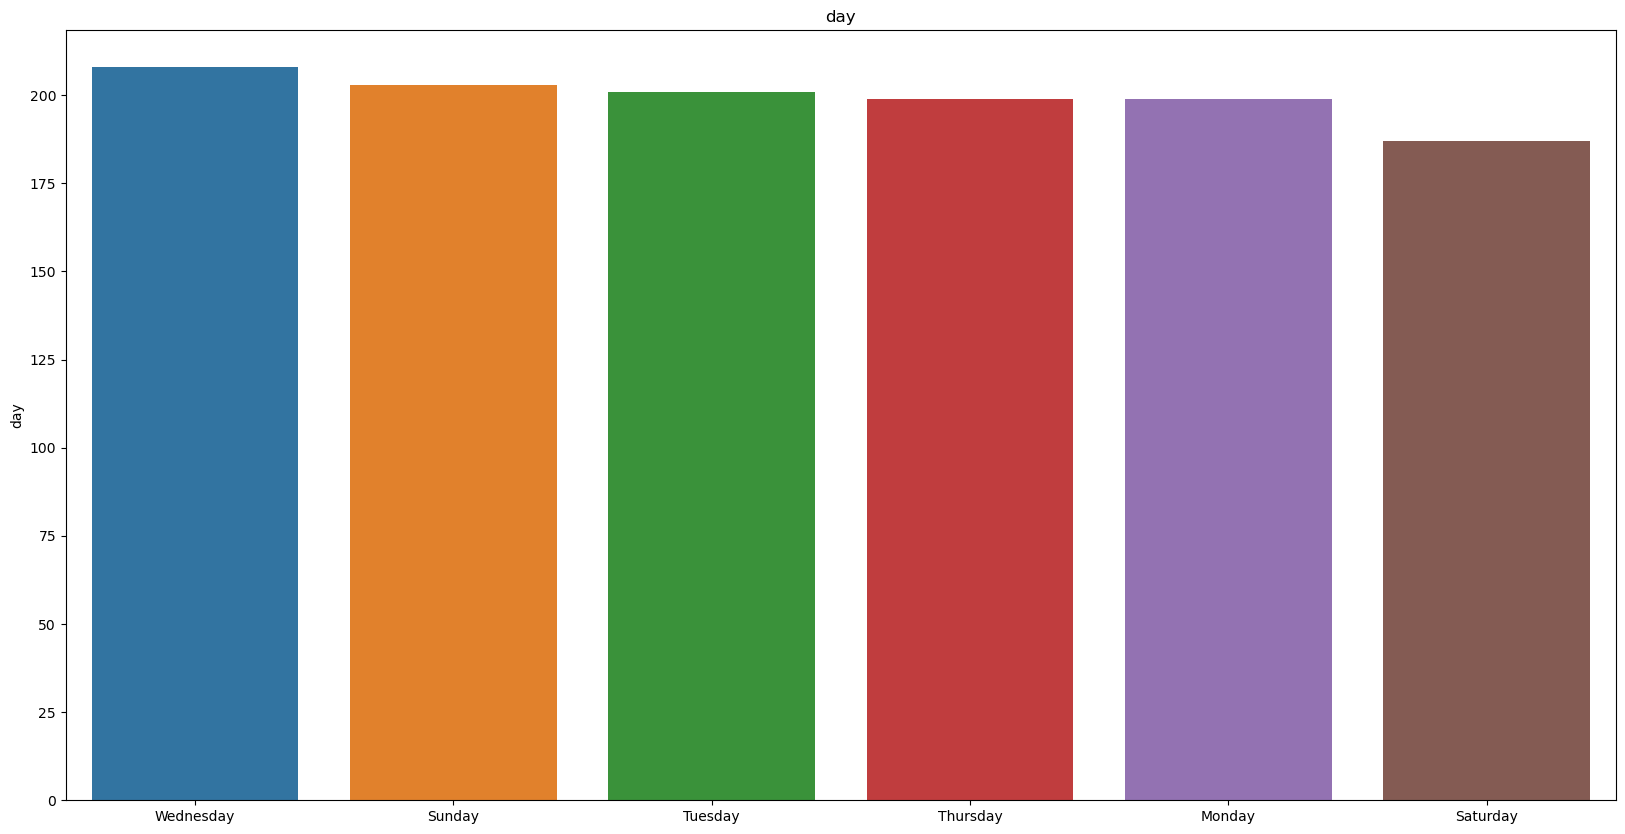

In [44]:
for i in cat_cols.columns[1:]:
    plt.figure(figsize=(20,10))
    sns.barplot(data=df, x=df[i].value_counts().index, y=df[i].value_counts())
    plt.title(i)

Exploratory Data Analysis

In [47]:
import datetime

In [48]:
df

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,0.0,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,0.0,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,0.0,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,0.0,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,0.0,1800,0,0.0,0,0,15.0,0.505889


In [49]:
df['Date'] = pd.to_datetime(df['date'])

In [50]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [53]:
df.drop(['Date','date'],axis=1,inplace=True)
df

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,Year,Month,Day
0,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,2015,1,1
1,Quarter1,finishing,Thursday,1,0.75,3.94,0.0,960,0,0.0,0,0,8.0,0.886500,2015,1,1
2,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,2015,1,1
3,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,2015,1,1
4,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,2015,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,Quarter2,finishing,Wednesday,10,0.75,2.90,0.0,960,0,0.0,0,0,8.0,0.628333,2015,3,11
1193,Quarter2,finishing,Wednesday,8,0.70,3.90,0.0,960,0,0.0,0,0,8.0,0.625625,2015,3,11
1194,Quarter2,finishing,Wednesday,7,0.65,3.90,0.0,960,0,0.0,0,0,8.0,0.625625,2015,3,11
1195,Quarter2,finishing,Wednesday,9,0.75,2.90,0.0,1800,0,0.0,0,0,15.0,0.505889,2015,3,11


Analysis by Quarter

In [56]:
target_by_quarter = df.groupby('quarter').mean().sort_values('targeted_productivity',ascending=False)['targeted_productivity']
target_by_quarter

C:\Users\Marcos Verdi\AppData\Local\Temp\ipykernel_21900\3950378160.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  target_by_quarter = df.groupby('quarter').mean().sort_values('targeted_productivity',ascending=False)['targeted_productivity']


quarter
Quarter1    0.744083
Quarter2    0.732090
Quarter3    0.721190
Quarter5    0.718182
Quarter4    0.714516
Name: targeted_productivity, dtype: float64

In [57]:
actual_prod_by_quarter = df.groupby('quarter').mean().sort_values('actual_productivity',ascending=False)['actual_productivity']
actual_prod_by_quarter

C:\Users\Marcos Verdi\AppData\Local\Temp\ipykernel_21900\1894928338.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  actual_prod_by_quarter = df.groupby('quarter').mean().sort_values('actual_productivity',ascending=False)['actual_productivity']


quarter
Quarter5    0.826177
Quarter1    0.751560
Quarter2    0.743710
Quarter4    0.709067
Quarter3    0.704759
Name: actual_productivity, dtype: float64

In [58]:
df['diff_in_productivity'] = df['actual_productivity'] - df['targeted_productivity']
df

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,Year,Month,Day,diff_in_productivity
0,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,2015,1,1,0.140725
1,Quarter1,finishing,Thursday,1,0.75,3.94,0.0,960,0,0.0,0,0,8.0,0.886500,2015,1,1,0.136500
2,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,2015,1,1,0.000570
3,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,2015,1,1,0.000570
4,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,2015,1,1,0.000382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,Quarter2,finishing,Wednesday,10,0.75,2.90,0.0,960,0,0.0,0,0,8.0,0.628333,2015,3,11,-0.121667
1193,Quarter2,finishing,Wednesday,8,0.70,3.90,0.0,960,0,0.0,0,0,8.0,0.625625,2015,3,11,-0.074375
1194,Quarter2,finishing,Wednesday,7,0.65,3.90,0.0,960,0,0.0,0,0,8.0,0.625625,2015,3,11,-0.024375
1195,Quarter2,finishing,Wednesday,9,0.75,2.90,0.0,1800,0,0.0,0,0,15.0,0.505889,2015,3,11,-0.244111


In [60]:
diff_in_productivity_by_quarter = df.groupby('quarter').mean().sort_values('diff_in_productivity',ascending=False)['diff_in_productivity']
diff_in_productivity_by_quarter

C:\Users\Marcos Verdi\AppData\Local\Temp\ipykernel_21900\2096262265.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff_in_productivity_by_quarter = df.groupby('quarter').mean().sort_values('diff_in_productivity',ascending=False)['diff_in_productivity']


quarter
Quarter5    0.107996
Quarter2    0.011620
Quarter1    0.007476
Quarter4   -0.005449
Quarter3   -0.016432
Name: diff_in_productivity, dtype: float64

no_of_workers :         Number of workers in each team<br/>
no_of_style_change :    Number of changes in the style of a particular product<br/>
smv :                   Standard Minute Value, it is the allocated time for a task<br/>
wip :                   Work in progress. Includes the number of unfinished items for products<br/>
over_time :             Represents the amount of overtime by each team in minutes<br/>
incentive :             Represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action<br/>
idle_time :             The amount of time when the production was interrupted due to several reasons<br/>
idle_men :              The number of workers who were idle due to production interruption<br/>

In [63]:
overtime_by_quarter = df.groupby('quarter').mean().sort_values('over_time',ascending=False)['over_time']
overtime_by_quarter

C:\Users\Marcos Verdi\AppData\Local\Temp\ipykernel_21900\4276051312.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  overtime_by_quarter = df.groupby('quarter').mean().sort_values('over_time',ascending=False)['over_time']


quarter
Quarter3    4896.000000
Quarter4    4851.250000
Quarter1    4480.916667
Quarter2    4355.014925
Quarter5    3725.454545
Name: over_time, dtype: float64

In [64]:
wip_by_quarter = df.groupby('quarter').sum().sort_values('wip',ascending=False)['wip']
wip_by_quarter

C:\Users\Marcos Verdi\AppData\Local\Temp\ipykernel_21900\450943267.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  wip_by_quarter = df.groupby('quarter').sum().sort_values('wip',ascending=False)['wip']


quarter
Quarter1    333380.0
Quarter2    176424.0
Quarter4    152765.0
Quarter3    132835.0
Quarter5     27208.0
Name: wip, dtype: float64

In [65]:
incentives_by_quarter = df.groupby('quarter').sum().sort_values('incentive',ascending=False)['incentive']
incentives_by_quarter

C:\Users\Marcos Verdi\AppData\Local\Temp\ipykernel_21900\614535374.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  incentives_by_quarter = df.groupby('quarter').sum().sort_values('incentive',ascending=False)['incentive']


quarter
Quarter2    23360
Quarter1     9882
Quarter4     6155
Quarter3     4881
Quarter5     1460
Name: incentive, dtype: int64

Analysis by Team

In [69]:
targeted_productivity_by_team = df.groupby('team').mean().sort_values('targeted_productivity',ascending=False)['targeted_productivity']
targeted_productivity_by_team

C:\Users\Marcos Verdi\AppData\Local\Temp\ipykernel_21900\1854852856.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  targeted_productivity_by_team = df.groupby('team').mean().sort_values('targeted_productivity',ascending=False)['targeted_productivity']


team
12    0.774242
9     0.758173
1     0.746667
3     0.742105
2     0.739908
10    0.738500
6     0.731383
4     0.717619
7     0.714271
8     0.708257
11    0.703977
5     0.673656
Name: targeted_productivity, dtype: float64

In [70]:
actual_productivity_by_team = df.groupby('team').mean().sort_values('actual_productivity',ascending=False)['actual_productivity']
actual_productivity_by_team

C:\Users\Marcos Verdi\AppData\Local\Temp\ipykernel_21900\85095240.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  actual_productivity_by_team = df.groupby('team').mean().sort_values('actual_productivity',ascending=False)['actual_productivity']


team
1     0.821054
3     0.803880
12    0.779055
2     0.770855
4     0.770035
9     0.734462
10    0.719736
5     0.697981
6     0.685385
11    0.681985
8     0.674148
7     0.668006
Name: actual_productivity, dtype: float64

In [71]:
diff_productivity_by_team = df.groupby('team').mean().sort_values('diff_in_productivity',ascending=False)['diff_in_productivity']
diff_productivity_by_team

C:\Users\Marcos Verdi\AppData\Local\Temp\ipykernel_21900\3145417518.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff_productivity_by_team = df.groupby('team').mean().sort_values('diff_in_productivity',ascending=False)['diff_in_productivity']


team
1     0.074388
3     0.061775
4     0.052416
2     0.030947
5     0.024325
12    0.004813
10   -0.018764
11   -0.021993
9    -0.023711
8    -0.034109
6    -0.045998
7    -0.046265
Name: diff_in_productivity, dtype: float64